<img src='./img/LogoWekeo_Copernicus_RGB_0.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='20%'></img>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./11_sentinel5p_L2_load_browse.ipynb"><< 11 - Sentinel-5P - Load and browse</a><span style="float:right;"><a href="./20_sentinel3_olci_l1_retrive.ipynb">20 - Sentinel-3 OLCI Level 1 - Retrieve >></a></span>

<div class="alert alert-block alert-success">
<b>EXERCISE WORKBOOK</b>
</div>

# Copernicus Sentinel-5 Precursor (Sentinel-5p) TROPOMI

This notebook is an `exercise workbook`, where you can practise the data handling with Sentinel-5p data. The exercises base on the workflow introduced in the notebook [Sentinel-5 Level 2 Carbon Monoxide - Load and browse](./11_sentinel5p_L2_load_browse.ipynb). We highly recommend that  you go through this notebook before you do this exercise workbook.

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code. Code exercises base on the notebook [Sentinel-5 Level 2 Carbon Monoxide - Load and browse](./11_sentinel5p_L2_load_browse.ipynb).

You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

### Outline

* [1. Load a Sentinel-5p data file](#load)
* [2. Select a data variable](#select_variable)
* [3. Load the latitude and longitude information and store some attributes](#lat_lon)
* [4. Visualize the DataArray](#visualize)
* [5. Create a geographical subset](#subset)
* [6. Convert the CO values from mol per m-2 to molecules per cm-2](#convert)

<hr>

#### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import geopandas as gpd

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Load helper functions

In [34]:
from ipynb.fs.full.functions import visualize_pcolormesh, generate_geographical_subset

<hr>

### Exercise example - Siberian fires monitored by Sentinel-5p

This exercise aims to get familiar with Sentinel-5P Carbon Monoxide data. The exercise examines the Siberian fires that occured in July and August 2019.

#### <a id='load'></a>1. Load a Sentinel-5p data file

Let us load a Sentinel-5p file of carbon monoxide from `23rd July 2019`. Multiple `netCDF` files can be loaded with the xarray function `xr.open_mfdataset()`.<br>
We define the following keyword arguments:
* `concat_dim`: the dimenension the files shall be concatenated, e.g. **scanline**
* `combine`: the way how the files shall be combined, choose between **nested** or **by_coords**
* `group`: specify the name of the group that holds the data. For Sentinel-5p data it is **PRODUCT**


Execute the cell below and try to understand how the loaded `xarray.Dataset` is structured.

In [2]:
file = xr.open_mfdataset('./data/sentinel_5p/co/2019/07/23/*',concat_dim='scanline', combine='nested',group='PRODUCT')
file

<xarray.Dataset>
Dimensions:                                (corner: 4, ground_pixel: 215, layer: 50, scanline: 6490, time: 1)
Coordinates:
  * ground_pixel                           (ground_pixel) float64 0.0 ... 214.0
  * layer                                  (layer) float32 49500.0 ... 500.0
  * corner                                 (corner) float64 0.0 1.0 2.0 3.0
  * time                                   (time) datetime64[ns] 2019-07-23
  * scanline                               (scanline) float64 0.0 ... 3.244e+03
    latitude                               (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
    longitude                              (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
Data variables:
    delta_time                             (time, scanline) datetime64[ns] dask.array<chunksize=(1, 3245), meta=np.ndarray>
    time_utc                               (time, scanline)

<div class="alert alert-block alert-success">
<b>Question:</b><br>
    How many dimensions does the loaded data file have? What data variables does the data file hold?
</div>

**Response**:<br>
The loaded data file has five dimensions:
* `corner`
* `ground_pixel`
* `layer`
* `scanline`
* `time`

The following data variables are offered:
* `delta_time`
* `qa_value`
* `carbonmonoxide_total_column`
* `carbonmonoxide_total_column_precision`

<br>


#### <a id='select_variable'></a> 2. Select a data variable

As a next step, you want to load the data variable `carbonmonoxide_total_column` from the xarray Dataset `file` above and call it `s5p_co`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the data variable <b>carbonmonoxide_total_column</b> from the xarray Dataset <i>file</i> and call it <b>s5p_co</b> 
</div>

In [3]:
# Enter your solution here






In [5]:
s5p_co = file['carbonmonoxide_total_column']
s5p_co

<xarray.DataArray 'carbonmonoxide_total_column' (time: 1, scanline: 6490, ground_pixel: 215)>
dask.array<concatenate, shape=(1, 6490, 215), dtype=float32, chunksize=(1, 3245, 215)>
Coordinates:
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          (time) datetime64[ns] 2019-07-23
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 3.243e+03 3.244e+03
    latitude      (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
    longitude     (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>
    What attributes are available for the <b>carbonmonoxide_total_column</b> variable?
</div>

**Response**:
The xarray DataArray offers the following attributes:
* `units`
* `standard_name`
* `long_name`
* `ancillary_variables`
* `multiplication_factor_to_convert_to_molecules_percm2`


<br>

You see that the DataArray has three dimensions, with the dimension time only having one entry. Let us select the single time step, in order to have the two-dimensional data array.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the one time step from the xarray DataArray <i>s5p_co</i> and call it <b>s5p_co_time</b> 
</div>

In [ ]:
# Enter your solution here






In [10]:
s5p_co_time = s5p_co[0,:,:]
s5p_co_time

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 6490, ground_pixel: 215)>
dask.array<getitem, shape=(6490, 215), dtype=float32, chunksize=(3245, 215)>
Coordinates:
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2019-07-23
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 3.243e+03 3.244e+03
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(3245, 215), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(3245, 215), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

<br>

#### <a id='lat_lon'></a>3. Load the latitude and longitude information and store some attributes

In preparation of plotting, let us store the `latitude` and `longitude` information and some attributes that might be useful later on.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the <b>longitude</b> and <b>latitude</b> values of the <i>s5p_co_time</i> DataArray and call it <b>latitude</b> and <b>longitude</b> respectively. 
</div>

In [ ]:
# Enter your solution here






In [11]:
latitude = s5p_co_time.latitude
print(latitude)
longitude = s5p_co_time.longitude
print(longitude)

<xarray.DataArray 'latitude' (scanline: 6490, ground_pixel: 215)>
dask.array<getitem, shape=(6490, 215), dtype=float32, chunksize=(3245, 215)>
Coordinates:
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2019-07-23
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 3.243e+03 3.244e+03
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(3245, 215), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(3245, 215), meta=np.ndarray>
Attributes:
    long_name:      pixel center latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds
<xarray.DataArray 'longitude' (scanline: 6490, ground_pixel: 215)>
dask.array<getitem, shape=(6490, 215), dtype=float32, chunksize=(3245, 215)>
Coordinates:
  * ground_pixel  (ground_pixel) float64 0.0 1.0

<br>

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which selects the following attributes:<br> 
- <b>units</b>,<br>
- <b>long_name</b>, and <br>
- <b>multiplication_factor.</b><br>

Call them <b>units</b>, <b>long_name</b> and <b>multiplication_factor</b> respectively.
</div>

In [12]:
# Enter your solution here







In [90]:
units = s5p_co_time.units
print(units)
long_name = s5p_co_time.long_name
print(long_name)

mol m-2
Vertically integrated CO column


#### <a id='visualize'></a>4. Visualize the DataArray

Now it is time to visualize the DataArray. You can use the pre-defined function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh) for it.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which visualizes the DataArray and makes use of the following:<br>
- the function <a href='./functions.ipynb#visualize_pcolormesh'>visualize_pcolormesh</a>,<br>
- the assigned variables <b>latitude</b> and <b>longitude</b>, and <br>
- the retrieved attributes <b>units</b> and <b>long_name</b>. 
    
<b>NOTE:</b><br> With `?visualize_pcolormesh`, you can see what keyword arguments the function requires.
</div>

In [16]:
?visualize_pcolormesh

In [ ]:
# Enter your solution here







(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9fddc317b8>)

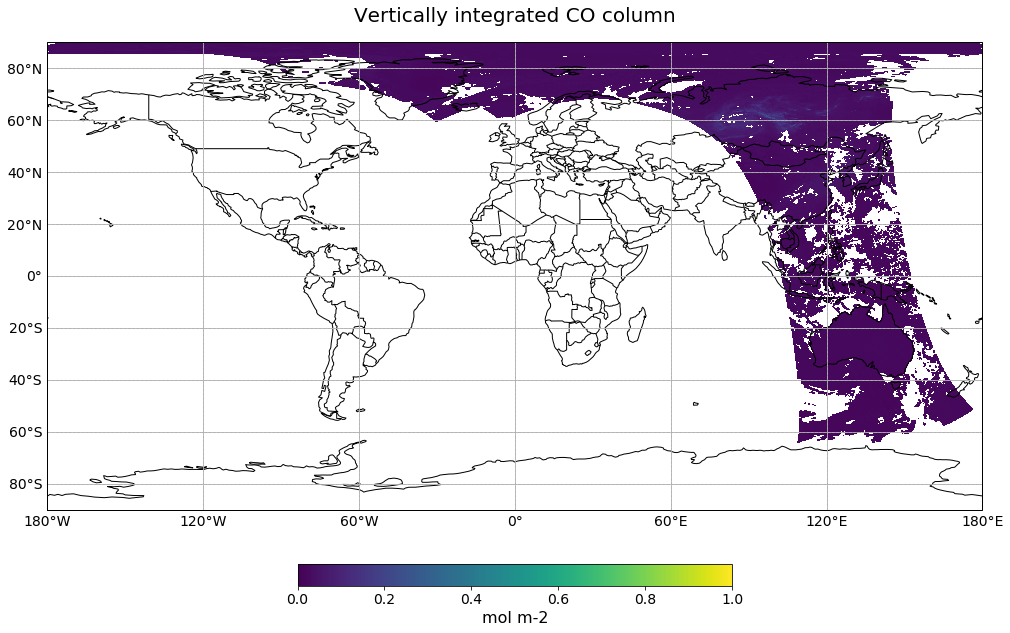

In [29]:
visualize_pcolormesh(
    s5p_co_time,
    longitude,
    latitude,
    ccrs.PlateCarree(),
    'viridis',
    units,
    long_name,
    0, 1,
    -180,180,-90,90,
    log=False,
    set_global=True)

<br>

The solution above uses `viridis` as color scale and `ccrs.PlateCarree()` as projection. However, the fire occurrences in Siberia are hardly recognizable. Some plotting parameters have to be fine-tuned.
You can e.g. change the `color scale` and the maximum bound of your data values and find a better way to visualize the fires.
Optionally, you can also change the projection to see the power of the Cartopy library.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Copy paste the code above for visualizing the DataArray and change the following keyword arguments:<br>
- the <b>color_scale</b>,<br>
- the <b>vmin</b> and <b>vmax</b>.<br>

Optionally, you can also change<br>
- the projection from <b>ccrs.PlateCarree()</b> to e.g. <b>ccrs.Mollweide()</b>.

<b>NOTE:</b><br>
See [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) available colormaps for matplotlib.

</div>

In [ ]:
# Enter your solution here








(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9fcc715630>)

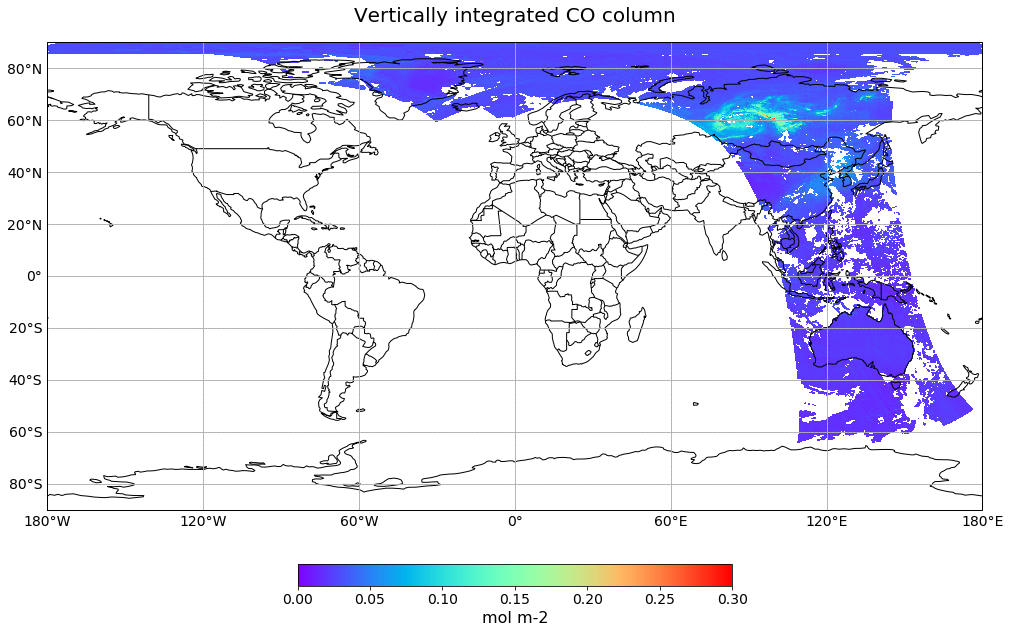

In [33]:
visualize_pcolormesh(
    s5p_co_time,
    longitude,
    latitude,
    ccrs.PlateCarree(),
    'rainbow',
    units,
    long_name,
    0, 0.3,
    -180,180,-90,90,
    log=False,
    set_global=True)

<br>

#### <a id='subset'></a>5. Create a geographical subset for Siberia

The data above cover much more than only Siberia, where the fires occured. Let us zoom into the region of fire occurence and create a geographical subset.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Create a geographical subset for Siberia. Make use of the function <a href='./functions.ipynb#generate_geographical_subset'>generate_geographical_subset</a> and call the new DataArray **s5p_co_subset**.<br>

The bounding box information can be the following:<br>
- **latmin=30**
- **latmax=75**
- **lonmin=50**
- **lonmax=150**

<b>NOTE:</b><br> With `?generate_geographical_subset`, you can see what keyword arguments the function requires.

</div>

In [47]:
?generate_geographical_subset

In [ ]:
# Enter your solution here







In [81]:
s5p_co_subset = generate_geographical_subset(
    s5p_co_time,
    latmin=30,
    latmax=75,
    lonmin=50,
    lonmax=150)
s5p_co_subset

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 1769, ground_pixel: 215)>
dask.array<where, shape=(1769, 215), dtype=float32, chunksize=(937, 215)>
Coordinates:
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2019-07-23
  * scanline      (scanline) float64 1.709e+03 1.71e+03 ... 2.539e+03 2.54e+03
    latitude      (scanline, ground_pixel) float32 24.399305 ... 80.88329
    longitude     (scanline, ground_pixel) float32 120.89838 ... 130.31232
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

<div class="alert alert-block alert-success">
<b>Question:</b><br>

How many entries for `scanline` does the DataArray **s5p_co_subset** have compared to the DataArray **s5p_co_time**?
</div>

**Response**

The scanline entries have reduced from formerly `6490` to now `1769` values.

<br>

And now, you can visualize the geographical subset. Make again use of the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh).

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Copy paste the code above for visualizing the DataArray and modify the keywords accordingly in order to visualize the subsetted DataArray **s5p_co_subset**. <br><br>



<b>NOTE:</b><br>
You will need to modify the keywords `set_global`, `latitude`, `longitude` and the `extent` information.

</div>

In [ ]:
# Enter your solution here







(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9f9d013f60>)

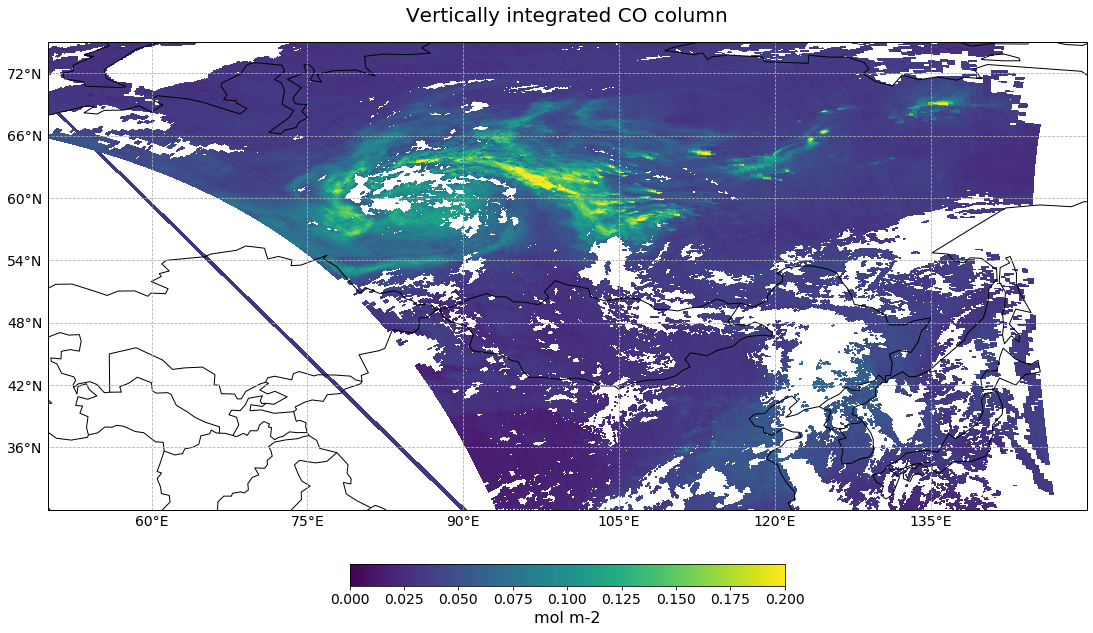

In [83]:
visualize_pcolormesh(
    s5p_co_subset,
    s5p_co_subset.longitude,
    s5p_co_subset.latitude,
    ccrs.PlateCarree(),
    'viridis',
    units,
    long_name,
    0, 0.2,
    50,150,30,75,
    log=False,
    set_global=False)

#### <a id='convert'></a>6. Convert the CO values from `mol per m-2` to `molecules per cm-2`

Sentinel-5p data are disseminated in `SI units` and the `SI unit` for the total column of carbon monoxide is `mol per m-2`. A more common unit is `molecules per cm-2` though. Let us convert the values from `mol per m-2` to `molecules per cm-2` with the help of the given **multiplication factor**.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Convert the data values of the subsetted DataArray to `molecules per cm-2` by multiplying the DataArray with the multiplication factor.
You might want to store the multiplication facor attribute as separate variable.

<b>NOTE:</b><br>
The multiplication factor is provided in the attributes of the DataArray **s5p_co_subset**.
</div>

In [ ]:
# Enter your solution here








In [91]:
multiplication_factor = s5p_co_subset.multiplication_factor_to_convert_to_molecules_percm2
print(multiplication_factor)

s5p_co_subset_converted = s5p_co_subset*multiplication_factor
print(s5p_co_subset_converted)

6.022141e+19
<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 1769, ground_pixel: 215)>
dask.array<mul, shape=(1769, 215), dtype=float32, chunksize=(937, 215)>
Coordinates:
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2019-07-23
  * scanline      (scanline) float64 1.709e+03 1.71e+03 ... 2.539e+03 2.54e+03
    latitude      (scanline, ground_pixel) float32 24.399305 ... 80.88329
    longitude     (scanline, ground_pixel) float32 120.89838 ... 130.31232


<br>

In a final step, we want to visualize the DataArray again, but this time the data values that are converted to `molecules per cm-2`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Visualize the DataArray **s5p_co_subset_converted** with the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh).

<b>NOTE:</b><br>
You might need to make adjustment of the following keyword arguments:

* **unit**
* the **DataArray** itself,
* **latitude** and **longitude**
* **vmin** and **vmax**
</div>

In [ ]:
# Enter your solution here








(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9f8ab7e748>)

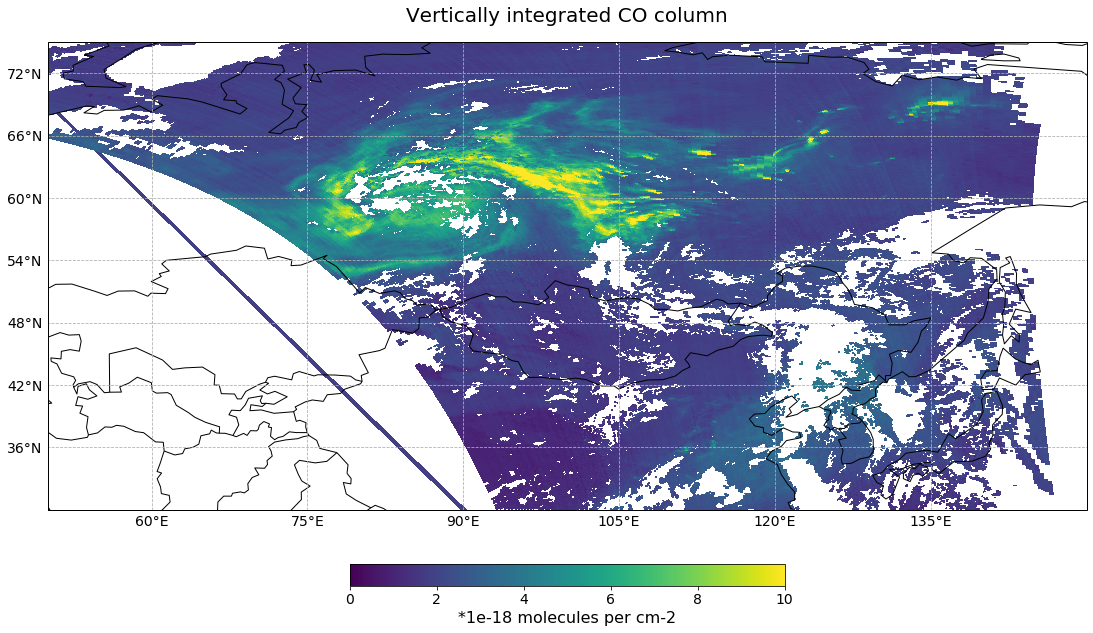

In [92]:
visualize_pcolormesh(
    s5p_co_subset_converted * 1e-18,
    s5p_co_subset_converted.longitude,
    s5p_co_subset_converted.latitude,
    ccrs.PlateCarree(),
    'viridis',
    '*1e-18 molecules per cm-2',
    long_name,
    0, 10,
    50,150,30,75,
    log=False,
    set_global=False)

<br>

This is the end of the exercise workbook and we hope that you feel more familiar with the Sentinel-5p Level-2 Carbon Monoxide data.

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./11_sentinel5p_L2_load_browse.ipynb"><< 11 - Sentinel-5P - Load and browse</a><span style="float:right;"><a href="./20_sentinel3_olci_l1_retrive.ipynb">20 - Sentinel-3 OLCI Level 1 - Retrieve >></a></span>

<hr>

<img src='./img/all_partners_wekeo.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='100%'></img>